In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import holidays

COUNTRY = "US"
CSV_PATH = "Data-GP1.csv"
DATE_FMT = "%m/%d/%y"


In [2]:
# Read, parse dates, and do light cleanup
df = pd.read_csv(
    CSV_PATH,
    parse_dates=["Dept_Date", "Purchase_Date"],
    date_parser=lambda s: pd.to_datetime(s, format=DATE_FMT, errors="coerce")
)

# Standardize column names (optional, but makes life easier)
df.columns = [c.strip() for c in df.columns]

# Coerce “flag” columns to int/bool where appropriate
flag_cols = ["isNormCabin", "isReturn", "isOneway"]
for c in flag_cols:
    if c in df.columns:
        df[c] = df[c].astype(int)

df.head()


/tmp/ipykernel_1086546/414417218.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv(


,num_seats_total,mean_net_ticket_price,Dept_Date,Purchase_Date,Train_Number_All,Culmulative_sales,isNormCabin,isReturn,isOneway,Customer_Cat
0,1,188.663422,2019-10-09,2018-10-10,A,1,1,0,0,A
1,1,358.428869,2019-05-27,2018-06-06,B,1,0,1,0,A
2,1,356.372684,2020-05-31,2019-06-17,B,1,0,1,0,A
3,1,396.370505,2019-12-10,2018-12-27,C,1,0,1,0,A
4,1,364.264552,2020-05-31,2019-06-19,B,2,0,1,0,A


In [ ]:
import holidays

# Build holiday calendars
sg_holidays = holidays.country_holidays("SG")  # Singapore
us_holidays = holidays.country_holidays("US")
cn_holidays = holidays.country_holidays("CN")
fr_holidays = holidays.country_holidays("FR")  # Europe proxy: France
in_holidays = holidays.country_holidays("IN")  # India
ru_holidays = holidays.country_holidays("RU")  # Russia

# Helper
def is_holiday_in(calendar, d):
    if pd.isna(d):
        return 0
    return int(d in calendar)

# Add holiday flags for Dept_Date
df["is_sg_holiday_dept"] = df["Dept_Date"].apply(lambda d: is_holiday_in(sg_holidays, d))
df["is_us_holiday_dept"] = df["Dept_Date"].apply(lambda d: is_holiday_in(us_holidays, d))
df["is_cn_holiday_dept"] = df["Dept_Date"].apply(lambda d: is_holiday_in(cn_holidays, d))
df["is_fr_holiday_dept"] = df["Dept_Date"].apply(lambda d: is_holiday_in(fr_holidays, d))
df["is_in_holiday_dept"] = df["Dept_Date"].apply(lambda d: is_holiday_in(in_holidays, d))
df["is_ru_holiday_dept"] = df["Dept_Date"].apply(lambda d: is_holiday_in(ru_holidays, d))

# Add holiday flags for Purchase_Date
df["is_sg_holiday_purchase"] = df["Purchase_Date"].apply(lambda d: is_holiday_in(sg_holidays, d))
df["is_us_holiday_purchase"] = df["Purchase_Date"].apply(lambda d: is_holiday_in(us_holidays, d))
df["is_cn_holiday_purchase"] = df["Purchase_Date"].apply(lambda d: is_holiday_in(cn_holidays, d))
df["is_fr_holiday_purchase"] = df["Purchase_Date"].apply(lambda d: is_holiday_in(fr_holidays, d))
df["is_in_holiday_purchase"] = df["Purchase_Date"].apply(lambda d: is_holiday_in(in_holidays, d))
df["is_ru_holiday_purchase"] = df["Purchase_Date"].apply(lambda d: is_holiday_in(ru_holidays, d))

df[[
    "Dept_Date","Purchase_Date",
    "is_sg_holiday_dept","is_us_holiday_dept","is_cn_holiday_dept","is_fr_holiday_dept","is_in_holiday_dept","is_ru_holiday_dept",
    "is_sg_holiday_purchase","is_us_holiday_purchase","is_cn_holiday_purchase","is_fr_holiday_purchase","is_in_holiday_purchase","is_ru_holiday_purchase"
]].head()


,Dept_Date,Purchase_Date,is_sg_holiday_dept,is_us_holiday_dept,is_cn_holiday_dept,is_fr_holiday_dept,is_in_holiday_dept,is_ru_holiday_dept,is_sg_holiday_purchase,is_us_holiday_purchase,is_cn_holiday_purchase,is_fr_holiday_purchase,is_in_holiday_purchase,is_ru_holiday_purchase
0,2019-10-09,2018-10-10,0,0,0,0,0,0,0,0,0,0,0,0
1,2019-05-27,2018-06-06,0,1,0,0,0,0,0,0,0,0,0,0
2,2020-05-31,2019-06-17,0,0,0,0,0,0,0,0,0,0,0,0
3,2019-12-10,2018-12-27,0,0,0,0,0,0,0,0,0,0,0,0
4,2020-05-31,2019-06-19,0,0,0,0,0,0,0,0,0,0,0,0


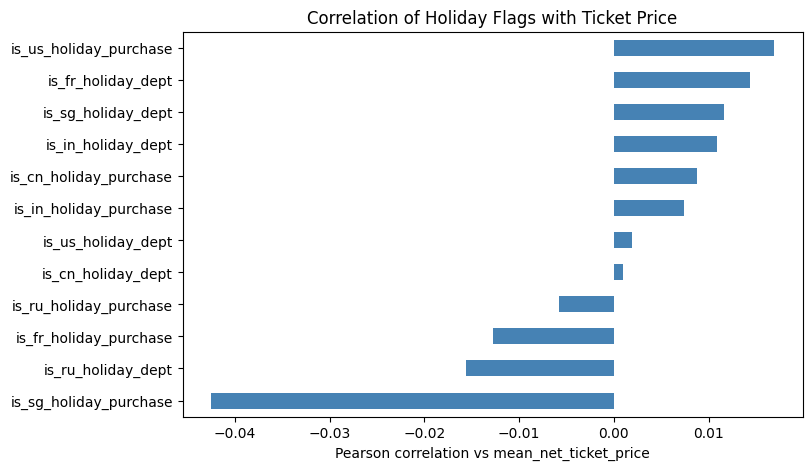

is_sg_holiday_dept        0.011648
is_us_holiday_dept        0.001880
is_cn_holiday_dept        0.000934
is_fr_holiday_dept        0.014373
is_in_holiday_dept        0.010897
is_ru_holiday_dept       -0.015583
is_sg_holiday_purchase   -0.042555
is_us_holiday_purchase    0.016946
is_cn_holiday_purchase    0.008727
is_fr_holiday_purchase   -0.012743
is_in_holiday_purchase    0.007428
is_ru_holiday_purchase   -0.005744
Name: mean_net_ticket_price, dtype: float64

In [4]:
import matplotlib.pyplot as plt

holiday_cols = [
    "is_sg_holiday_dept","is_us_holiday_dept","is_cn_holiday_dept","is_fr_holiday_dept","is_in_holiday_dept","is_ru_holiday_dept",
    "is_sg_holiday_purchase","is_us_holiday_purchase","is_cn_holiday_purchase","is_fr_holiday_purchase","is_in_holiday_purchase","is_ru_holiday_purchase"
]

corrs = df[holiday_cols + ["mean_net_ticket_price"]].corr()["mean_net_ticket_price"].drop("mean_net_ticket_price")

plt.figure(figsize=(8,5))
corrs.sort_values().plot(kind="barh", color="steelblue")
plt.title("Correlation of Holiday Flags with Ticket Price")
plt.xlabel("Pearson correlation vs mean_net_ticket_price")
plt.show()

corrs
